# Linearni klasifikator



U ovom primeru pokazaćemo vam kako da implementirate jednostavan klasifikator podataka u dve klase.


In [372]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline


Neka su elementi dati u sledeće dve klase:

In [373]:
klasaA = [(3, 4), (1.5, 5), (6,8), (2.5, 5)]

klasaB = [(5, 2.5), (5,2), (8,3), (4.5, 3)]

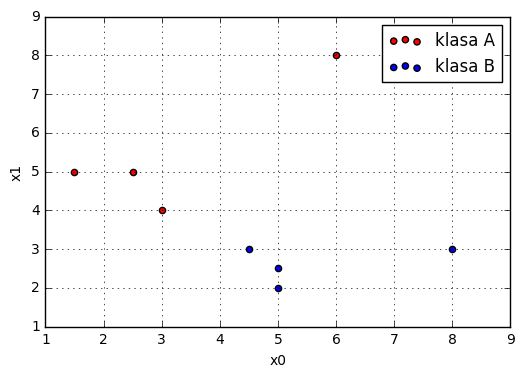

In [374]:
klasaA = np.array(klasaA)
klasaB = np.array(klasaB)

plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A')
plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B')
plt.grid(True)
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()

Elementima klase A pridruzicemo broj 1 a elementima klase B broj -1.

In [375]:
data = []
for el in klasaA:
    data.append([np.array([el[0], el[1], 1.]), 1.])

for el in klasaB:
    data.append([np.array([el[0], el[1], 1.]), -1.])
    
data = np.array(data)
print data

[[array([ 3.,  4.,  1.]) 1.0]
 [array([ 1.5,  5. ,  1. ]) 1.0]
 [array([ 6.,  8.,  1.]) 1.0]
 [array([ 2.5,  5. ,  1. ]) 1.0]
 [array([ 5. ,  2.5,  1. ]) -1.0]
 [array([ 5.,  2.,  1.]) -1.0]
 [array([ 8.,  3.,  1.]) -1.0]
 [array([ 4.5,  3. ,  1. ]) -1.0]]


Jednačina linearnog klasifikatora u 2D prostoru

$ w_0*x_0 + w_1*x_1+ w_2*1 < 0$

$ w_0*x_0 + w_1*x_1+ w_2*1 = 0$

$ w_0*x_0 + w_1*x_1+ w_2*1 > 0$



In [376]:
w = np.array([1., -1., -1.])

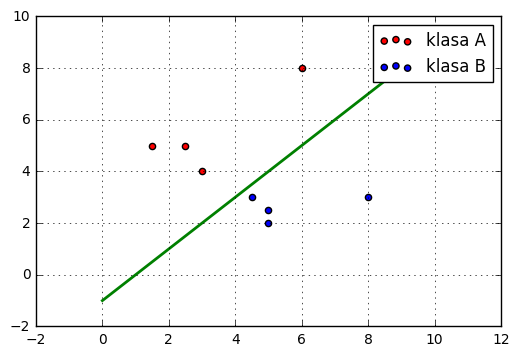

In [377]:
def nacrtaj_granicu(w, klasaA, klasaB):
    x_g = [0, 10] 
    y_g = [(-w[0]*x-w[2])/w[1] for x in x_g]

    plt.plot(x_g, y_g, 'g', lw=2)
    plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A')
    plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B')

    plt.grid(True)
    plt.legend()
    
    
nacrtaj_granicu(np.array([1., -1., -1.]), klasaA, klasaB)    

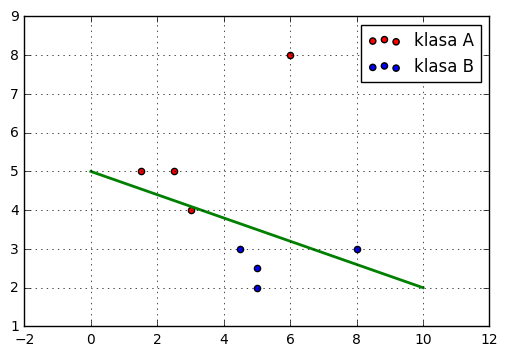

In [378]:

nacrtaj_granicu([0.3, 1., -5.], klasaA, klasaB)


In [379]:
def greske(w0, data):    
    max_it = 10
    for it in range(max_it):
        el = random.choice(data)
        rt = np.inner(w0, el[0])
        if(np.sign(el[1]) == np.sign(rt)):
            print 'OK', el[0]
        else:
            print 'ERR', el[0]

In [380]:
greske(np.array([0.3, 1., -5.]), data)

OK [ 6.  8.  1.]
OK [ 1.5  5.   1. ]
OK [ 1.5  5.   1. ]
OK [ 1.5  5.   1. ]
OK [ 5.   2.5  1. ]
OK [ 2.5  5.   1. ]
ERR [ 8.  3.  1.]
ERR [ 3.  4.  1.]
OK [ 1.5  5.   1. ]
OK [ 5.  2.  1.]


In [398]:
def linearna_klasifikacija(w0, data):
    print len(data)
    t = []
    ls = 0.005 # korak ucenja
    
    max_it = 5000
    for it in range(max_it):
        err = 0 # broj pogresno klasifikovanih elemenata
        n = 100
        for i in range(n):
            el = random.choice(data)
            #el = data[i]
            
            rt = np.inner(w0, el[0]) # odredi sa koje strane w0 se nalazi
            if(np.sign(rt)!= np.sign(el[1])): # ako nije sa dobre strane
                w0 -= ls*el[0] *np.sign(rt) 
                err += 1
        #err = 100.*err/float(n)
        t.append([it, err])
        if(it%50==0):
            print it, err, w0, ls
        if err==0:
            break
        
    return w0, np.array(t)

In [399]:
w, t = linearna_klasifikacija(np.array([0.3, 1., -5.]), data)
print w

240
0 20 [ 0.20172328  1.13077416 -4.97      ] 0.005
50 5 [-0.26645974  1.64921841 -4.745     ] 0.005
[-0.38744116  1.68397978 -4.685     ]


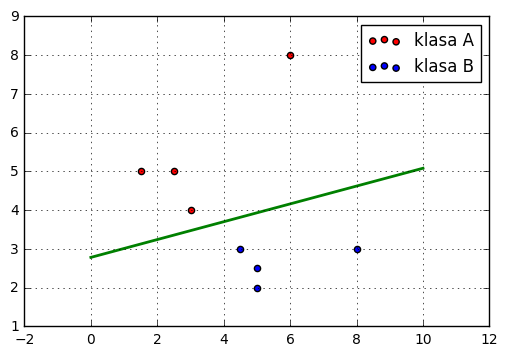

In [400]:
nacrtaj_granicu(w, klasaA, klasaB)

## Malo komplikovaniji primer

In [401]:


w = np.array([1., -1., -1.])


In [402]:
xl = 10*np.random.random(size=200)
xl = xl.reshape(100, 2)

x_list = np.array([(x[0], x[1], 1) for x in xl])


data = np.array([(x, np.inner(x, w)) for x in x_list])


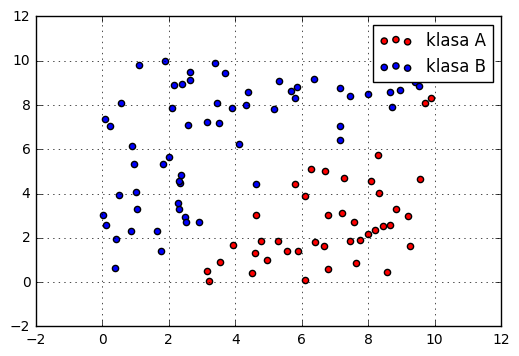

In [403]:
klasaA = np.array([(x[0], x[1], rr) for (x, rr) in data if rr>0])

klasaB = np.array([(x[0], x[1], rr) for (x, rr) in data if rr<0])
#print klasaB

plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A')
plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B')

plt.grid(True)
plt.legend()


In [404]:
w, t = linearna_klasifikacija(np.array([0.3, 1., -5.]), data)
print w

100
0 47 [ 0.41997833  0.23277579 -4.995     ] 0.005
50 4 [ 1.76962578 -1.41815228 -4.22      ] 0.005
[ 1.87664845 -1.50623133 -4.135     ]


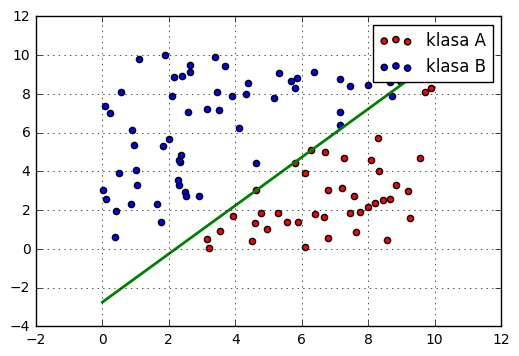

In [405]:
nacrtaj_granicu(w, klasaA, klasaB)

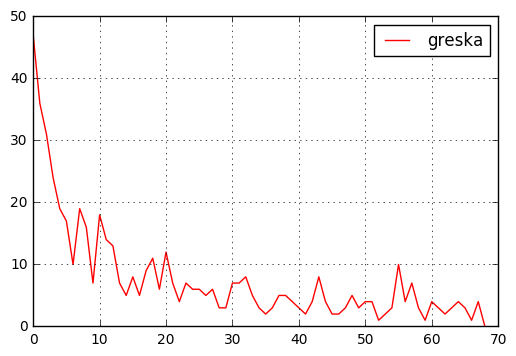

In [406]:
plt.plot(t[:,0], t[:,1], c='r', label='greska')

plt.grid(True)
plt.legend()
    

# Malo primera a dobar rezultat

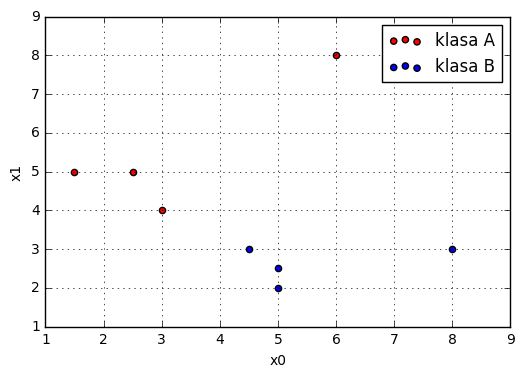

In [407]:
klasaA = [(3, 4), (1.5, 5), (6,8), (2.5, 5)]

klasaB = [(5, 2.5), (5,2), (8,3), (4.5, 3)]

klasaA = np.array(klasaA)
klasaB = np.array(klasaB)

plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A', s=20)
plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B', s=20)
plt.grid(True)
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()

## Generisati primere koji su u okolini primera na osnovu kojih se uči

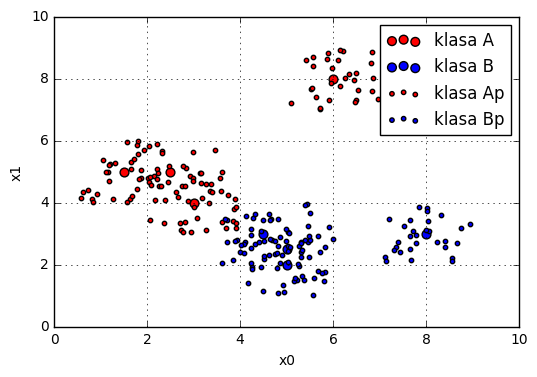

In [408]:
import random

klasaAp = []

klasaBp = []

for el in klasaA:
    for r in range(30):
        da = random.uniform(-1, 1)
        db = random.uniform(-1, 1)
        klasaAp.append([el[0]+da, el[1]+db, 1.])

for el in klasaB:
    for r in range(30):
        da = random.uniform(-1, 1)
        db = random.uniform(-1, 1)
        klasaBp.append([el[0]+da, el[1]+db, 1.])


klasaA = np.array(klasaA)
klasaB = np.array(klasaB)

klasaAp = np.array(klasaAp)
klasaBp = np.array(klasaBp)


plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A', s=40)
plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B', s=40)

plt.scatter(klasaAp[:,0], klasaAp[:,1], c='r', label='klasa Ap', s=10)
plt.scatter(klasaBp[:,0], klasaBp[:,1], c='b', label='klasa Bp', s=10)

plt.grid(True)
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()




In [409]:
data = []
for el in klasaAp:
    data.append([np.array([el[0], el[1], 1.]), 1.])

for el in klasaBp:
    data.append([np.array([el[0], el[1], 1.]), -1.])
    
data = np.array(data)


In [410]:
w, t = linearna_klasifikacija(np.array([0.3, 1., -5.]), data)
print w
print t[-1]

240
0 14 [ 0.19595983  1.03960701 -4.99      ] 0.005
50 5 [-0.35534886  1.77561568 -4.665     ] 0.005
100 4 [-0.58048395  1.99149465 -4.49      ] 0.005
150 6 [-0.70970072  2.08936778 -4.385     ] 0.005
[-0.74202259  2.09295485 -4.37      ]
[162   0]


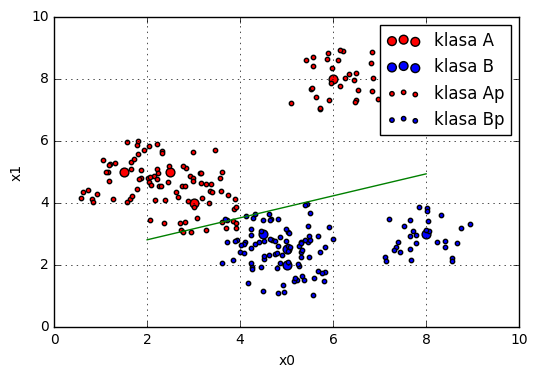

In [411]:
#xx_g = []
#yy_g = []

#err = 0
#n = len(data)
#for i in range(n):
#    #el = random.choice(data)
#    el = data[i]
#    rt = np.inner(w, el[0]) # odredi sa koje strane w0 se nalazi
#    if(np.sign(rt)== np.sign(el[1])): 
#        xx_g.append(el[0][0])
#        yy_g.append(el[0][1])
#    else:
#        err +=1
#print err


x_g = [2, 8] 
y_g = [(-w[0]*x-w[2])/w[1] for x in x_g]

plt.plot(x_g, y_g, c='g')
plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A', s=40)
plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B', s=40)

plt.scatter(klasaAp[:,0], klasaAp[:,1], c='r', label='klasa Ap', s=10)
plt.scatter(klasaBp[:,0], klasaBp[:,1], c='b', label='klasa Bp', s=10)

#plt.scatter(xx_g, yy_g, c='y', label='granica', s=10)


plt.grid(True)
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()




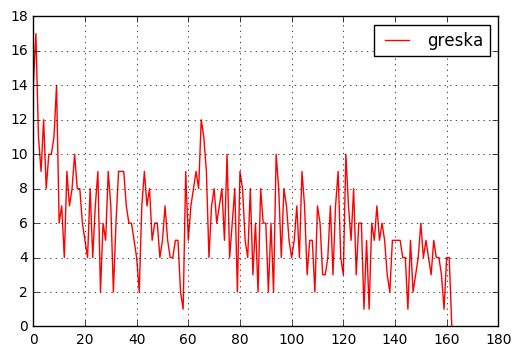

In [412]:
plt.plot(t[:,0], t[:,1], c='r', label='greska')

plt.grid(True)
plt.legend()
    